In [1]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import scipy.signal
import nana
from astropy import units as u

In [2]:
search_result = lk.search_lightcurve('KIC 5202905', mission='Kepler')
lc_collection = search_result.download_all()

In [3]:
lc = lc_collection.stitch()
total_observation_time = lc.time[-1] - lc.time[0]
print(total_observation_time)
delta_f = (1/total_observation_time).value
print(delta_f)

1470.4622572100852
0.0006800582572566702


In [4]:
sampling_rate_days= np.median(np.diff(lc.time))
f_max = 1 / (sampling_rate_days) #in days

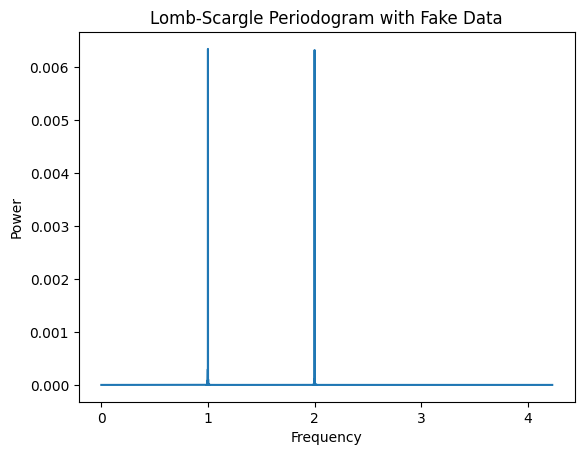

In [5]:
##Example with Fake Data to Get Correct Units
##Cannot Strip Units because lightkurve automatically adds units when using the to_periodogram function

##using LightKurve Periodogram function, WITH DAYS!
T_obs = 1 / delta_f
time = np.arange(0, T_obs, sampling_rate_days.value)
flux =  1+ 0.01 * np.cos(2 * np.pi * time) + 0.01* np.cos(4 * np.pi * time) + 0.001 * np.random.normal(size=time.shape) #fake flux data

lc_fake = lk.LightCurve(time=time, flux=flux) #light curve will automatically assume time is in days
frequency_grid_fake = np.arange(delta_f, f_max.value, delta_f) 

pg_fake2 = lc_fake.to_periodogram(
    #method='lombscargle',
    normalization='psd',
    frequency=frequency_grid_fake
)


fakefreq2 = np.array(pg_fake2.frequency.to(1/u.day).value) ##adding units here is key!!! otherwise it will automatically plot in microhertz
#fakefreq2 = np.array(pg_fake2.frequency.value) #when using this fakefreq it plots in microhertz
fakepow2 = np.array(pg_fake2.power.value)  

plt.close('all')
plt.plot(fakefreq2, fakepow2)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title("Lomb-Scargle Periodogram with Fake Data")
plt.show()

In [7]:
frequency_grid = np.arange(delta_f, f_max, delta_f) 

pg_test = lc.to_periodogram(
    method='lombscargle',
    normalization='psd',
    frequency=frequency_grid
)

freq_values = np.array(pg_test.frequency.to(1/u.day).value)  
freq_values_microhertz = np.array(pg_test.frequency.value)  
power_values = np.array(pg_test.power.value)  

plt.close('all')

plt.figure(figsize=(8, 4))
plt.plot(freq_values, power_values, 'k-', lw=0.8) 
plt.xlabel("Frequency (1/d)")
plt.ylabel("Power")
plt.title("Lomb-Scargle Periodogram")
plt.show()


UnitConversionError: Can only apply 'subtract' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan).

In [8]:
indices = nana.get_started(100, freq_values, power_values)
print(indices)
print(len(indices))

NameError: name 'freq_values' is not defined

In [9]:
def threshold20(indices, xs, ys): #looking at plus, minus 20 around peak
    good_peaks = []
    peak_multiples = 0
    med_med = []
    for i in indices:
        leftside = ys[i-20:i]  
        rightside = ys[i+1:i+21]
        median = np.nanmedian(np.concatenate((leftside,rightside)))
        print("index:", i, "median:", median,"multiple:", ys[i]/median)
        peak_multiples += ys[i]/median
        med_med.append(ys[i]/median)
        if ys[i] > 5*median:
            good_peaks.append(i)
            print("good peak identified")
    print("average multiple = ",peak_multiples/len(indices))
    median_median = np.nanmedian(med_med)
    print("median multiple:", median_median)
    return np.array(good_peaks)

In [10]:
good_peaks = threshold20(indices, freq_values, power_values)

NameError: name 'indices' is not defined

In [11]:
def threshold10(indices, xs, ys): #looking at plus minus 10 around peak
    good_peaks = []
    peak_multiples = 0
    med_med = []
    for i in indices:
        leftside = ys[i-10:i]  
        rightside = ys[i+1:i+11]
        median = np.nanmedian(np.concatenate((leftside,rightside)))
        print("index:", i, "median:", median,"multiple:", ys[i]/median)
        peak_multiples += ys[i]/median
        med_med.append(ys[i]/median)
        if ys[i] > 5*median:
            good_peaks.append(i)
            print("good peak identified")
    print("average multiple = ",peak_multiples/len(indices))
    median_median = np.nanmedian(med_med)
    print("median multiple:", median_median)
    return np.array(good_peaks)

In [12]:
good_peaks10= threshold10(indices, freq_values, power_values)

NameError: name 'indices' is not defined

In [13]:
#top 10 peak indices
topten =  nana.get_started(10, freq_values, power_values)
print(topten)

NameError: name 'freq_values' is not defined

In [14]:
print(freq_values[topten])

NameError: name 'freq_values' is not defined

In [15]:
#ratio of  d2y/dx2 at peak) / (y_peak)
#I'm expecting ratios 10^6, but now its 10^7

xs_refined, ys_refined, second_derivative = nana.refine_peaks(freq_values, power_values, topten)
ratio = (second_derivative/ys_refined)
print("this is ratio of (d2y/dx2 at peak) / (y_peak):", ratio)

NameError: name 'freq_values' is not defined

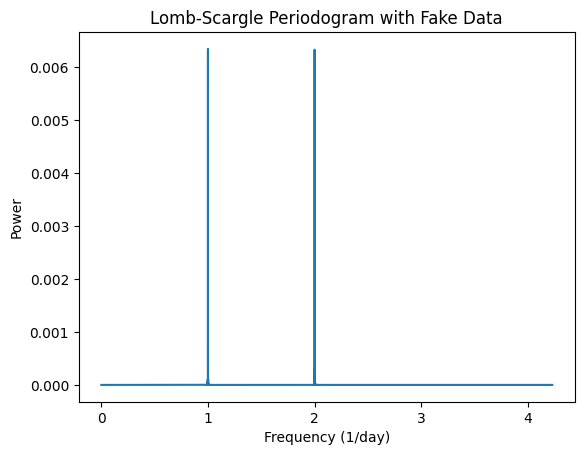

In [16]:
##Fake data Generation

##using LightKurve Periodogram function, WITH DAYS!
time = np.arange(0, T_obs, sampling_rate_days.value)
flux =  1+ 0.01 * np.cos(2 * np.pi * time) + 0.01* np.cos(4 * np.pi * time) + 0.001 * np.random.normal(size=time.shape)

lc_fake = lk.LightCurve(time=time, flux=flux) #light curve will automatically assume 


delta_f_new = delta_f/u.day
f_max_new = (f_max.value)/u.day
frequency_grid_fake = np.arange(delta_f, f_max.value, delta_f) 

pg_fake2 = lc_fake.to_periodogram(
    #method='lombscargle',
    normalization='psd',
    frequency=frequency_grid_fake
)


fakefreq2 = np.array(pg_fake2.frequency.to(1/u.day).value) 
#fakefreq2 = np.array(pg_fake2.frequency.value) 
fakepow2 = np.array(pg_fake2.power.value)  

plt.close('all')
plt.plot(fakefreq2, fakepow2)
plt.xlabel("Frequency (1/day)")
plt.ylabel("Power")
plt.title("Lomb-Scargle Periodogram with Fake Data")
plt.show()

In [17]:
print(lc_fake.time, lc_fake.flux)

[0.00000000e+00 2.04336009e-02 4.08672017e-02 ... 1.47040192e+03
 1.47042235e+03 1.47044279e+03] [1.01951992 1.02009301 1.01995094 ... 0.99445709 0.99702122 0.99907855]
